In [2]:
import pandas as pd
from pathlib import Path
import numpy as np 
#import pkg_resources
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss


In [3]:
df = pd.read_excel(Path("data") / "credit.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cle                  1000 non-null   int64 
 1   Comptes              1000 non-null   int64 
 2   Duree_credit         1000 non-null   int64 
 3   Historique_credit    1000 non-null   object
 4   Objet_credit         1000 non-null   object
 5   Montant_credit       1000 non-null   int64 
 6   Epargne              1000 non-null   int64 
 7   Anciennete_emploi    1000 non-null   int64 
 8   Taux_effort          1000 non-null   int64 
 9   Situation_familiale  1000 non-null   object
 10  Garanties            1000 non-null   object
 11  Anciennete_domicile  1000 non-null   int64 
 12  Biens                1000 non-null   object
 13  Age                  1000 non-null   int64 
 14  Autres_credits       1000 non-null   object
 15  Statut_domicile      1000 non-null   object
 16  Nb_cred

In [5]:
#%%
# Sélection des variables numériques et variables catégorielles
# Cle à exclure (car identification de l'observation)
# Variables numériques : Age, Montant_credit, Duree_credit
# Variables catégorielles : toutes les autres
var_num = df[['Age', 'Montant_credit', 'Duree_credit']]
var_cat = df.drop(columns=['Cle', 'Age', 'Montant_credit', 'Duree_credit'])


In [7]:
#%%
# --- Statistiques descriptives - Variables numériques ---
print("Statistiques descriptives variables numériques :")
var_num.describe()

Statistiques descriptives variables numériques :


,Age,Montant_credit,Duree_credit
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


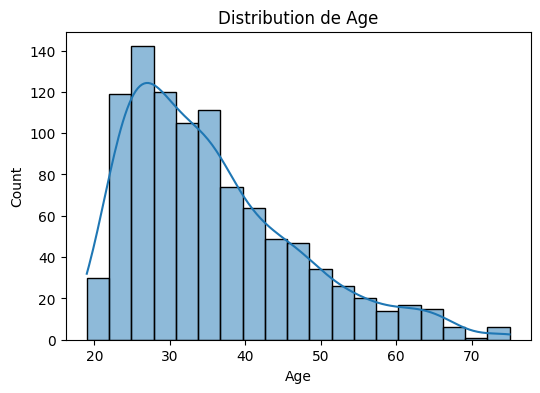

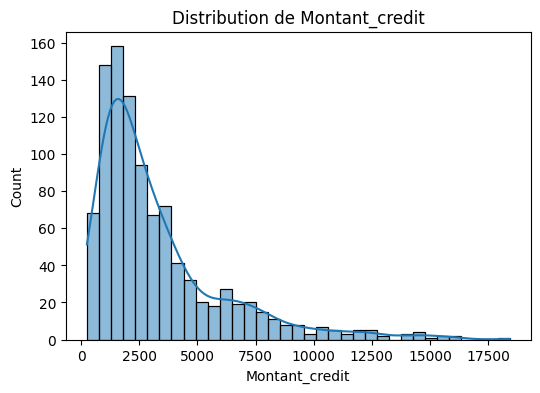

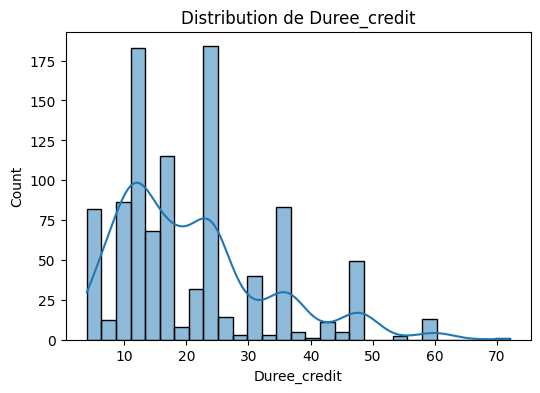

In [8]:
# %%
# Distributions
for col in var_num.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(var_num[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()
# Asymétrie pour Age, Montant_credit, et distribution irrégulière et asymétrique pour Duree_credit

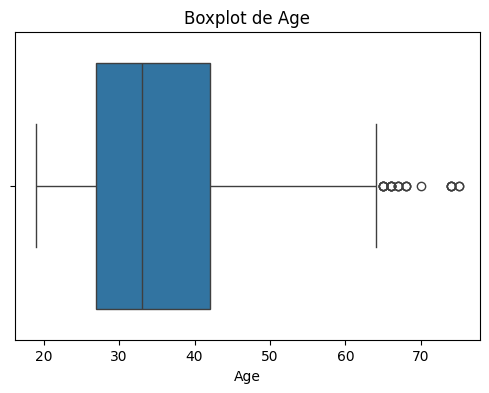

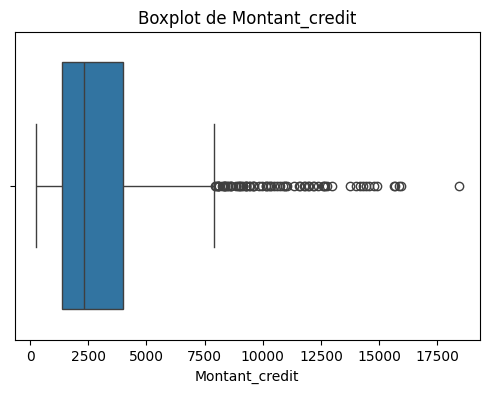

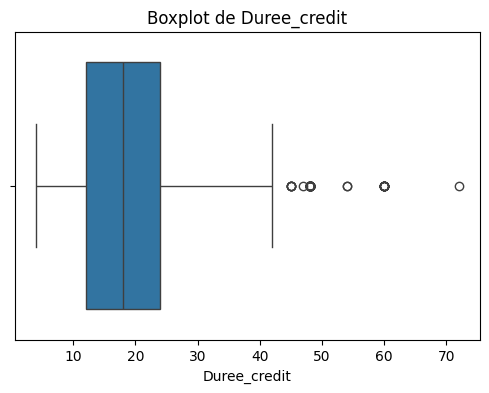

In [9]:
#%%
# Boxplot
for col in var_num.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=var_num[col])
    plt.title(f"Boxplot de {col}")
    plt.show()
# 13 valeurs potentiellements atypiques dans Age
# Beaucoup dans Montant_credit
# 10 dans Duree_credit

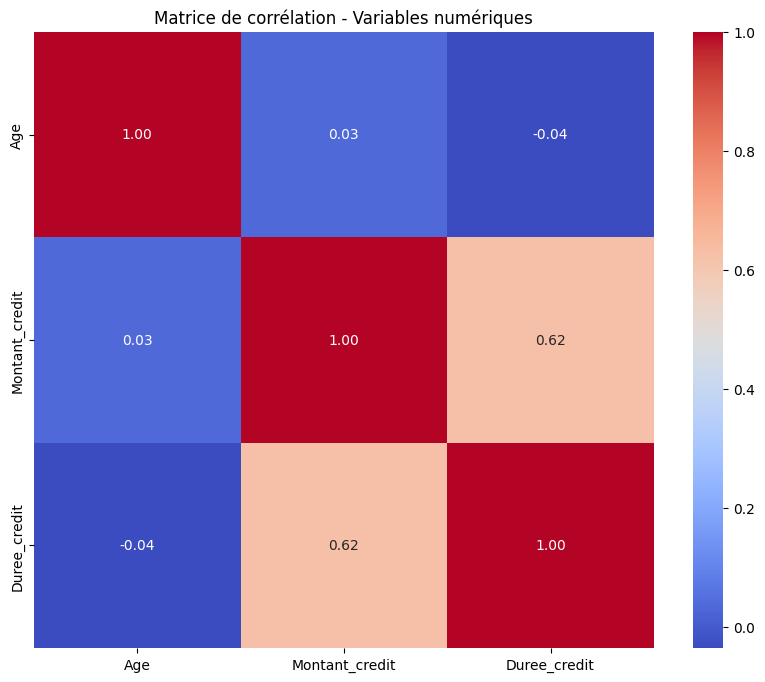

In [10]:
#%%
# Corrélations
plt.figure(figsize=(10,8))
corr_matrix = var_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation - Variables numériques")
plt.show()
# Corrélation de 0.62 entre Montant_credit et Duree_credit

In [11]:
#%%
# --- Statistiques descriptives - Variables catégorielles ---
print("Statistiques descriptives variables catégorielles :")
var_cat.describe()

Statistiques descriptives variables catégorielles :


,Comptes,Epargne,Anciennete_emploi,Taux_effort,Anciennete_domicile,Nb_credits,Nb_pers_charge,Cible
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,1.190000,3.384000,2.973000,2.845000,1.407000,1.155000,1.300000
std,1.257638,0.966869,1.208306,1.118715,1.103718,0.577654,0.362086,0.458487
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,5.000000,4.000000,4.000000,2.000000,1.000000,2.000000
max,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,2.000000,2.000000


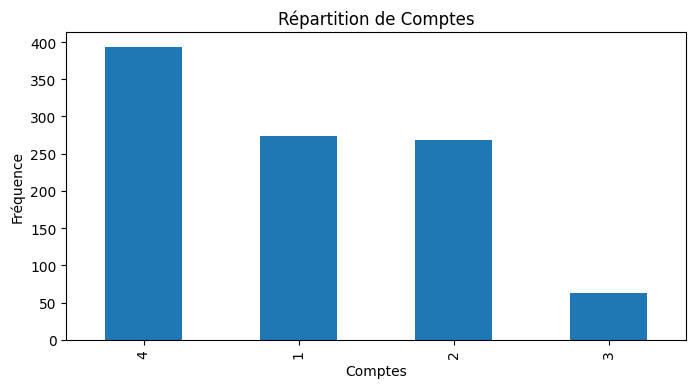

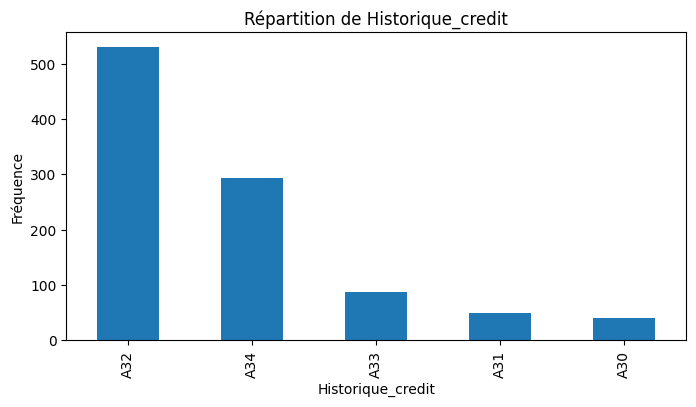

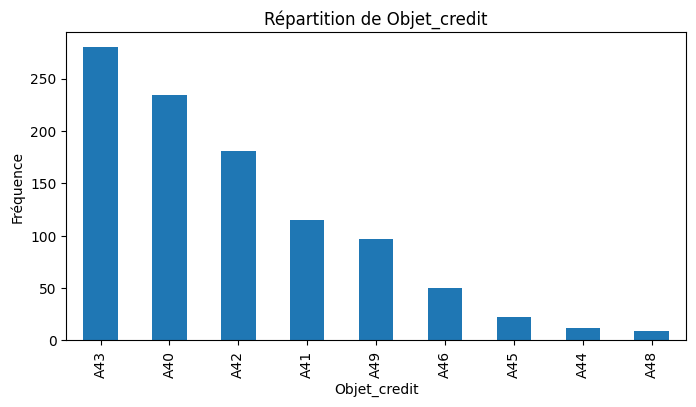

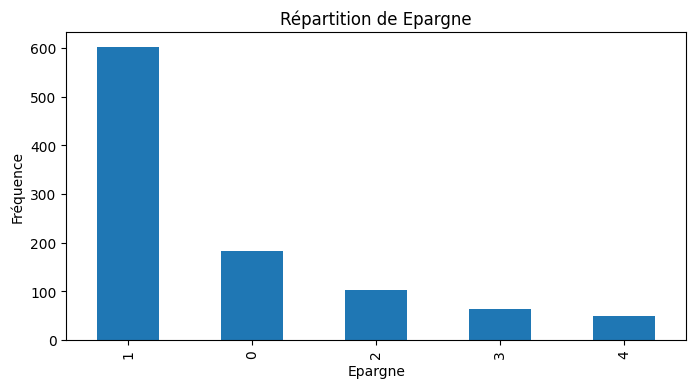

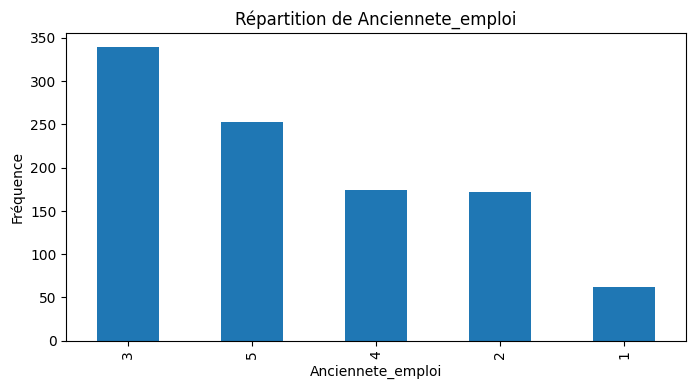

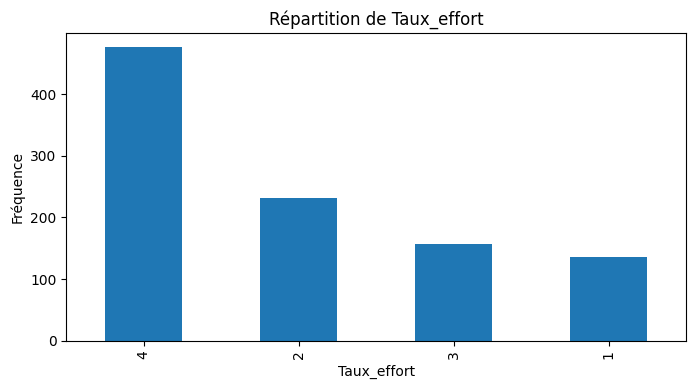

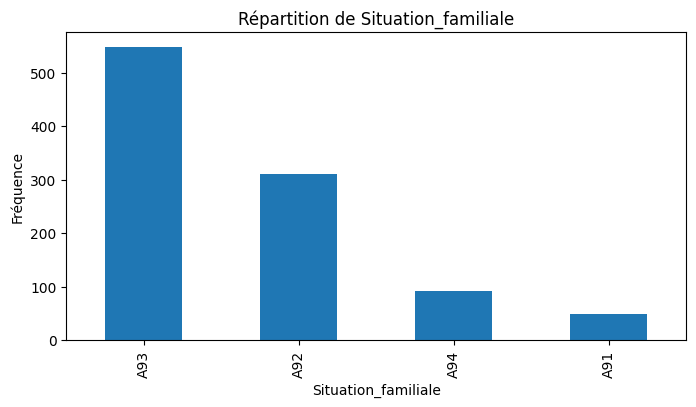

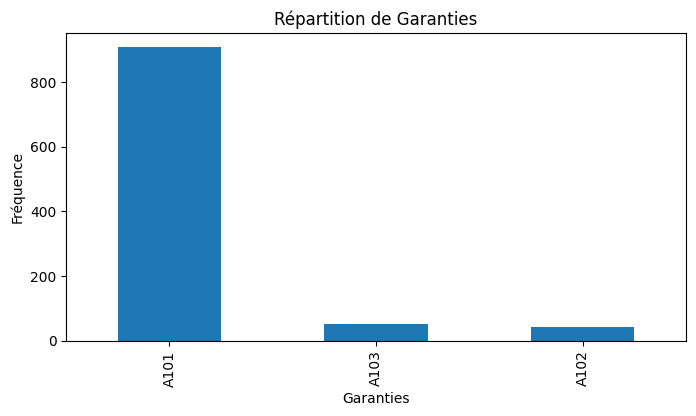

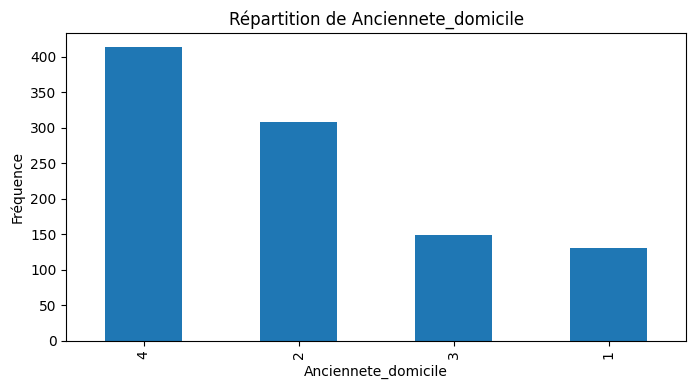

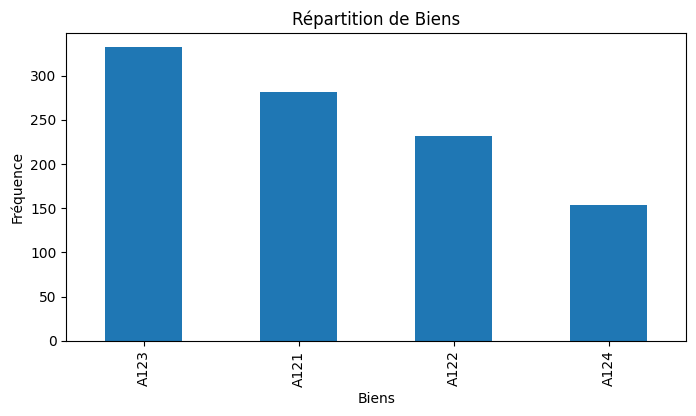

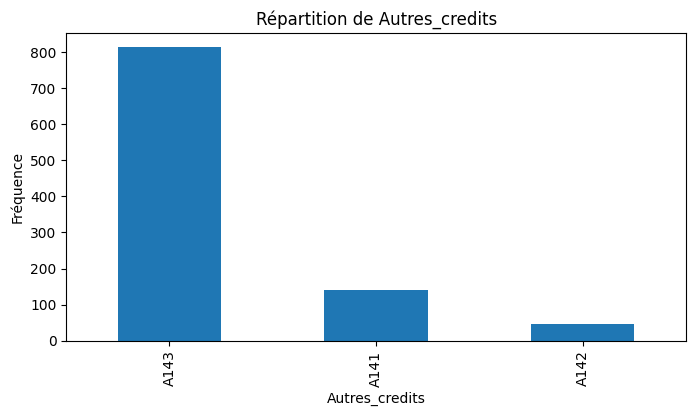

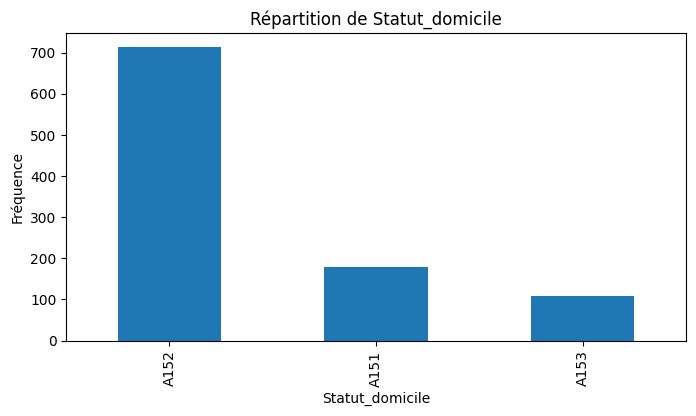

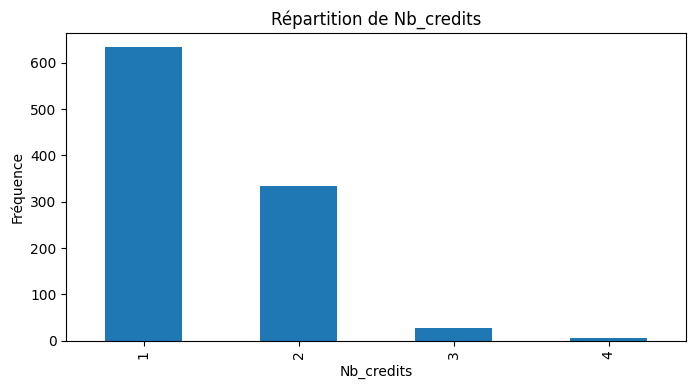

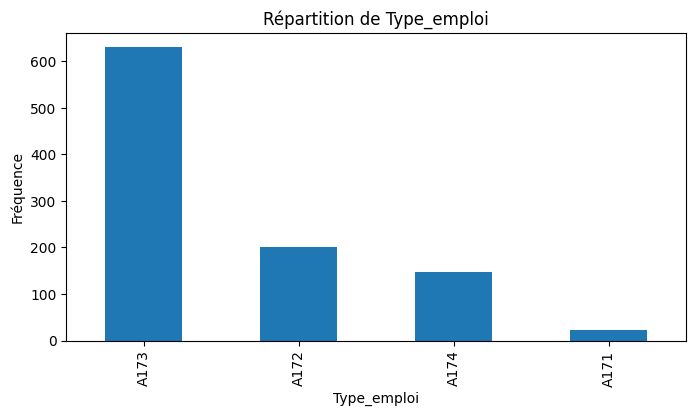

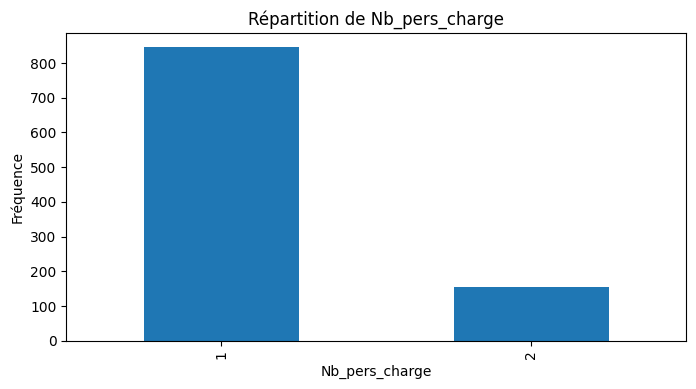

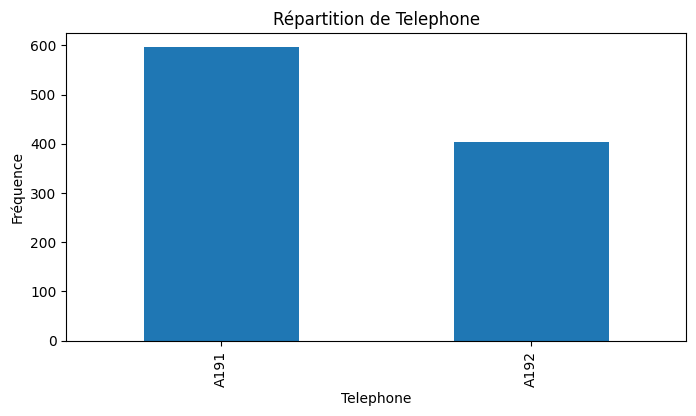

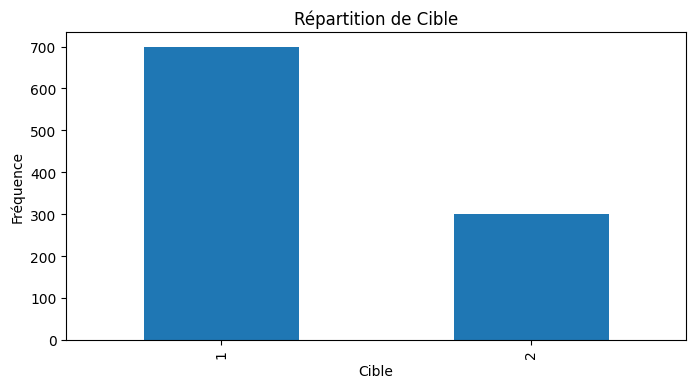

In [12]:
#%%
# Barplot
for col in var_cat.columns:
    plt.figure(figsize=(8,4))
    var_cat[col].value_counts().plot(kind='bar')
    plt.title(f"Répartition de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

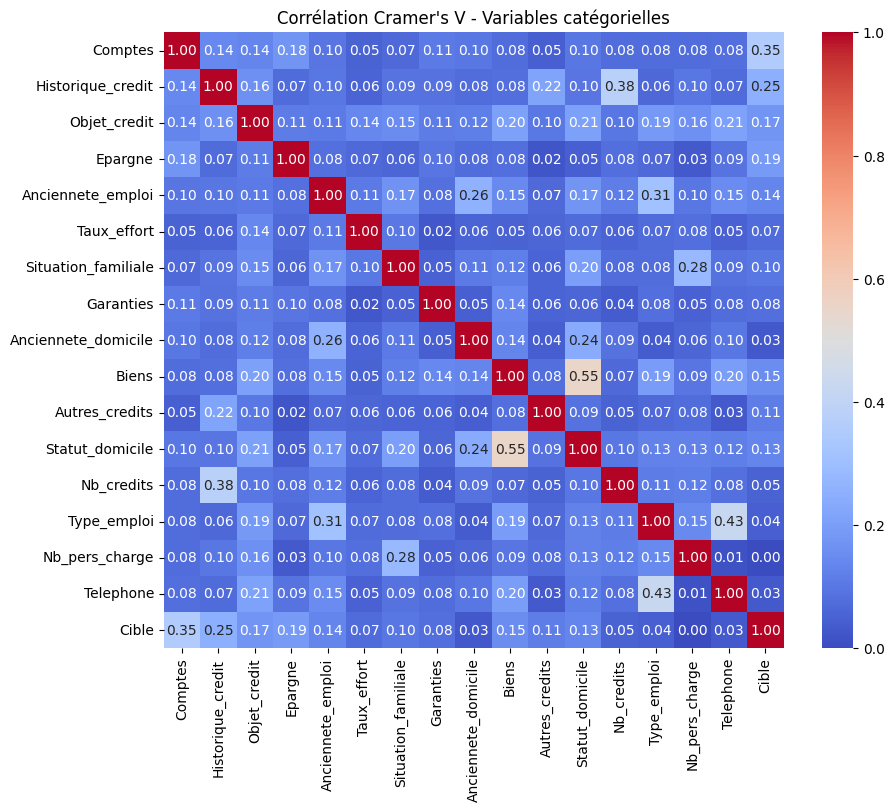

In [6]:
#%%
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))
cat_cols = var_cat.columns
cramers = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), 
                       index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers.loc[col1, col2] = cramers_v(var_cat[col1], var_cat[col2])
plt.figure(figsize=(10,8))
sns.heatmap(cramers, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation Cramer's V - Variables catégorielles")
plt.show()
# Corrélation de 0.55 entre Statut_domicile et Biens

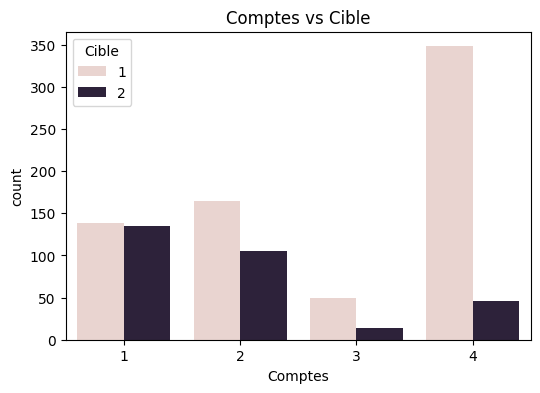

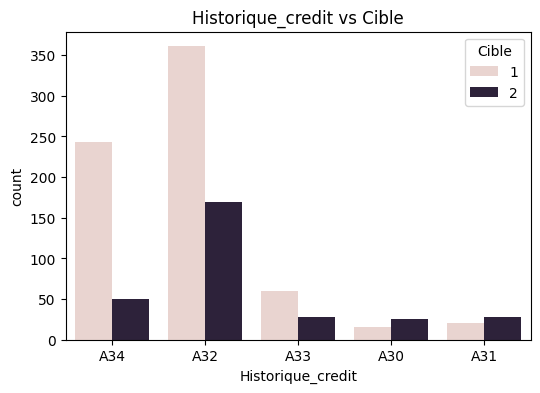

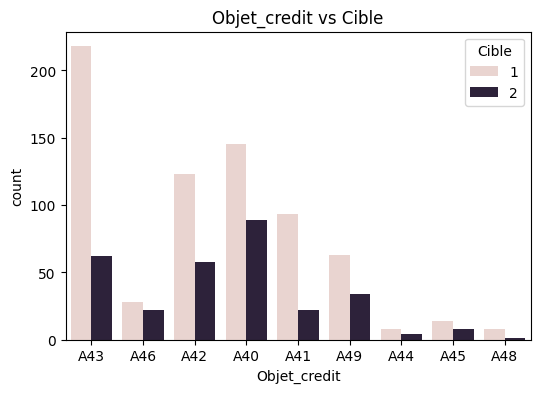

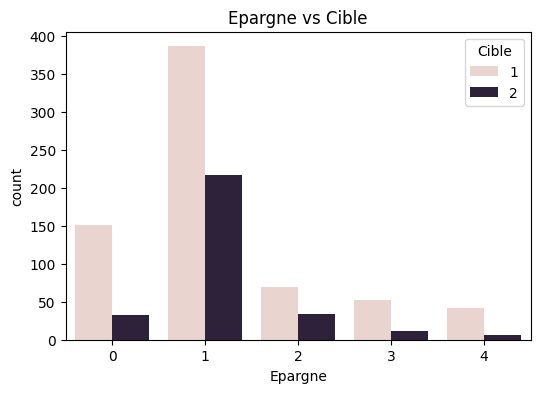

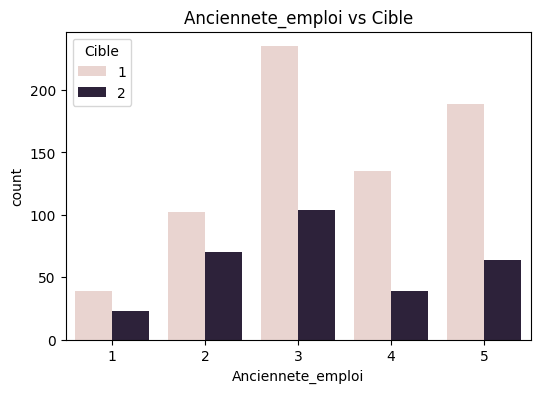

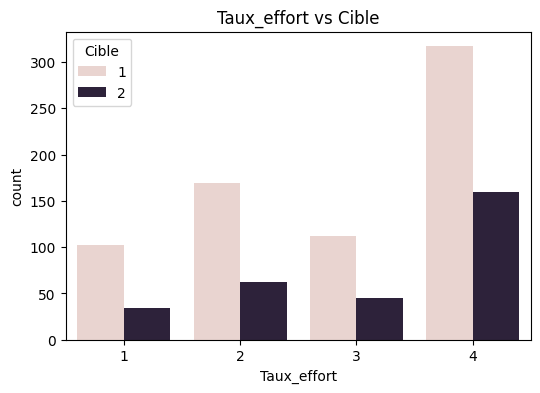

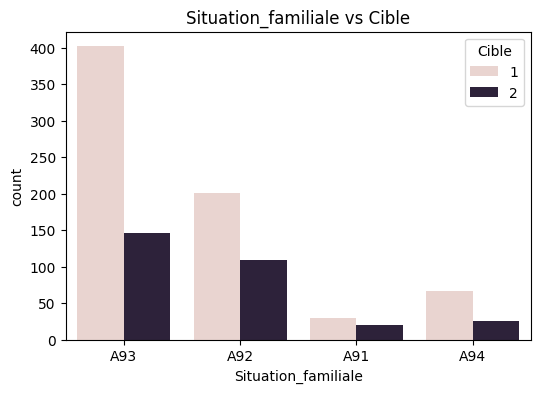

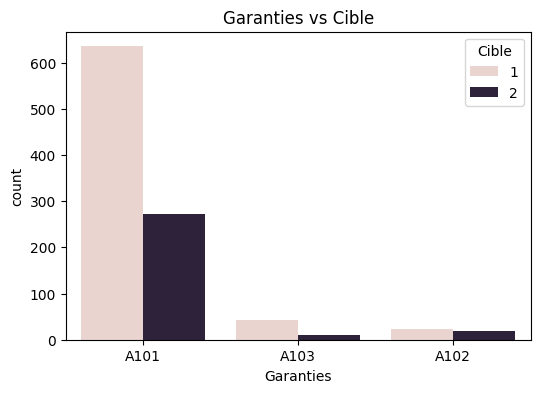

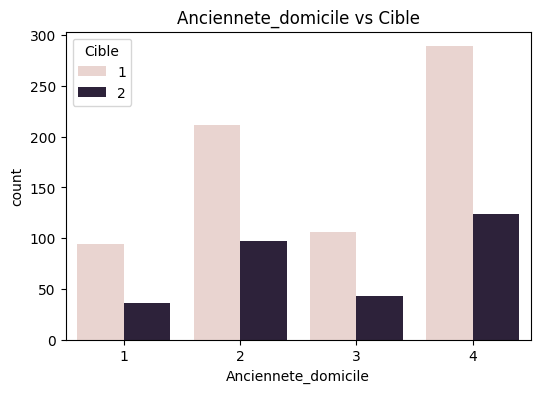

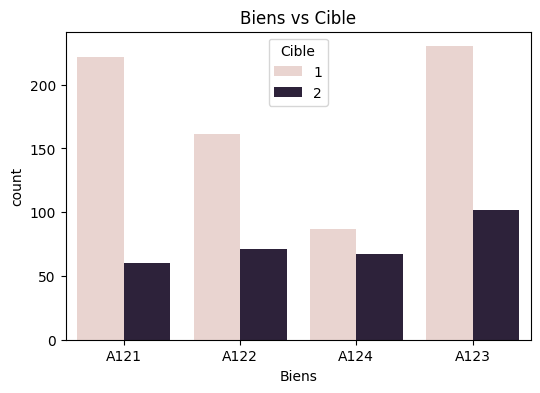

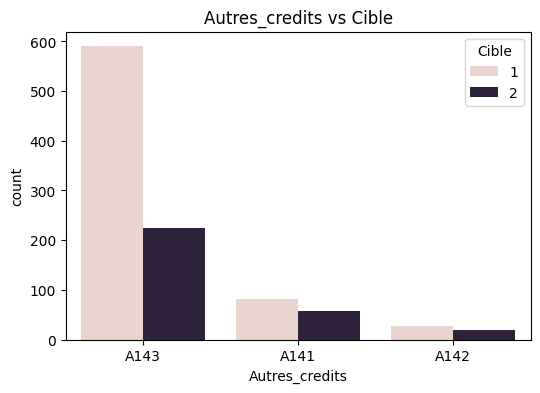

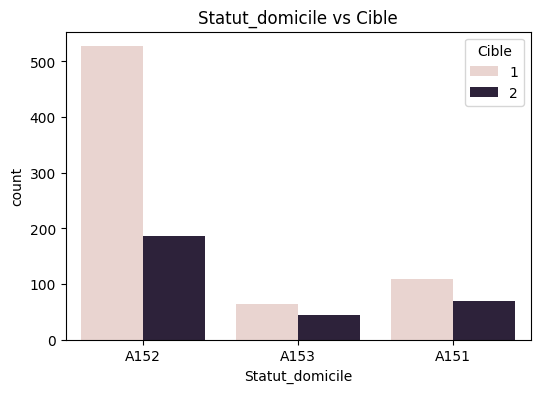

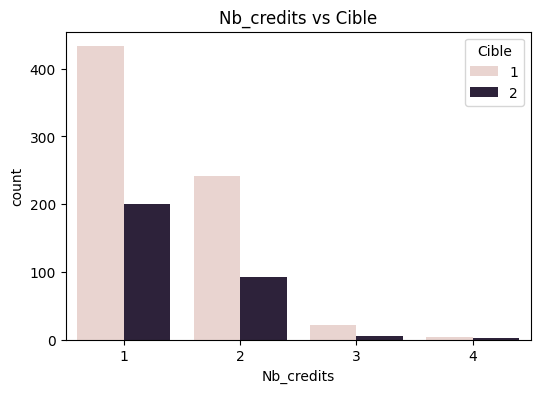

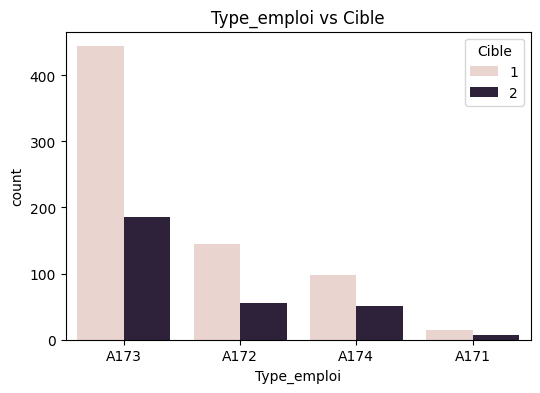

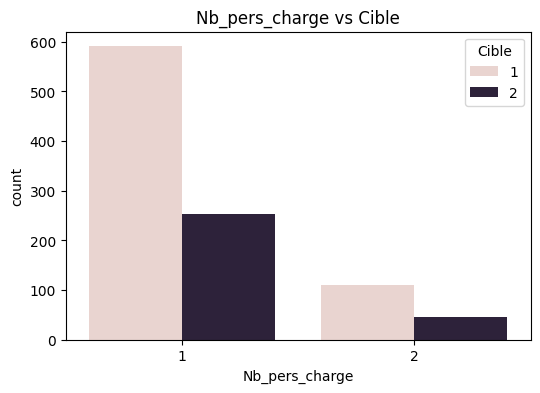

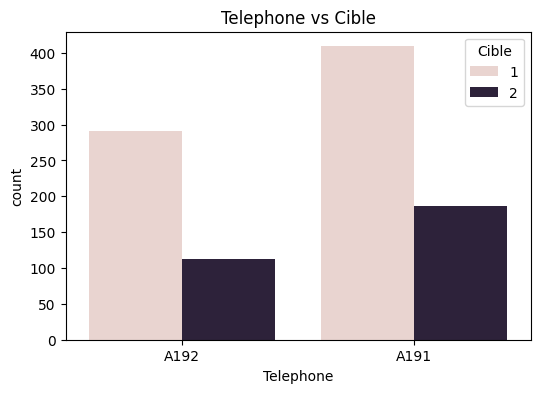

In [7]:
# %%
# --- Exploration visuelle des données ---
# Par rapport à la variable Cible (en enlevant les variables continues numériques)
# Barplots croisés
for col in df.drop(columns=['Cible', 'Cle', 'Montant_credit', 'Duree_credit', 'Age']).columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Cible', data=df)
    plt.title(f"{col} vs Cible")
    plt.show()

In [ ]:
# %%
# Histogrammes empilés
for col in df.drop(columns=['Cible', 'Cle', 'Montant_credit', 'Duree_credit', 'Age']).columns:
    cross_tab = pd.crosstab(df[col], df['Cible'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"Proportion de Cible par {col}")
    plt.ylabel("Proportion")
    plt.show()

In [ ]:
# %%
# --- Représentation variable Cible ---
prop = df['Cible'].value_counts(normalize=True) * 100
prop.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Proportion des classes de la variable Cible")
plt.xlabel("Cible")
plt.ylabel("Pourcentage (%)")
plt.show()